<a href="https://colab.research.google.com/github/mohamedaminsharaf/Amit_Assignments/blob/main/Phishing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Website Phishing.csv')
df.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [4]:
df.isna().sum()

SFH                  0
popUpWidnow          0
SSLfinal_State       0
Request_URL          0
URL_of_Anchor        0
web_traffic          0
URL_Length           0
age_of_domain        0
having_IP_Address    0
Result               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


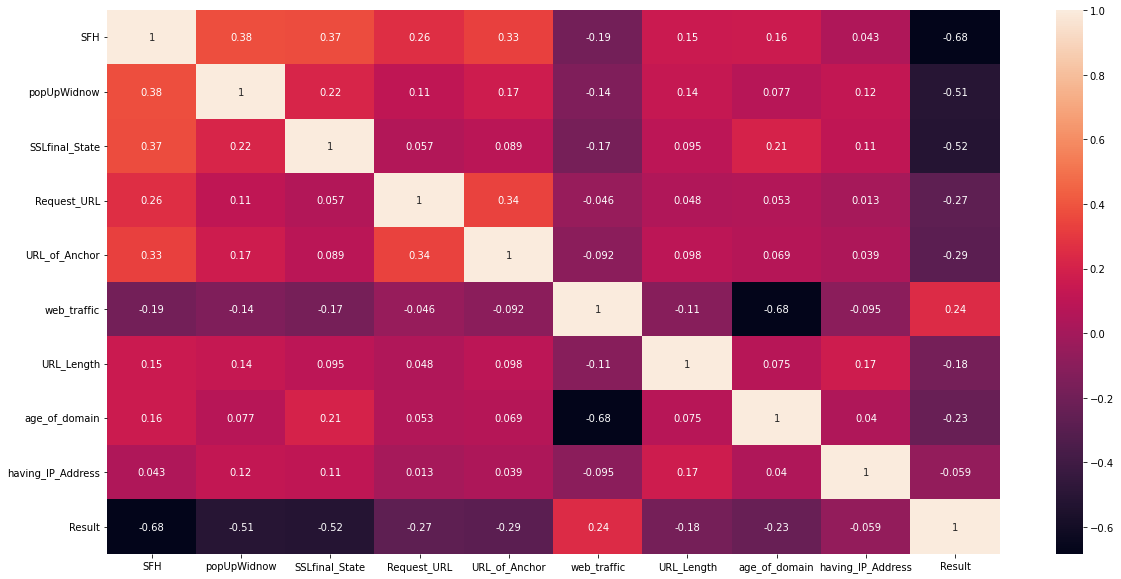

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

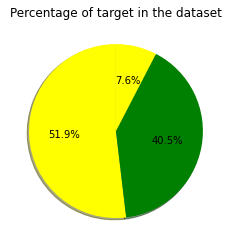

In [8]:
sizes = df['Result'].value_counts(sort = True)
colors = ["yellow","green"] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of target in the dataset')
plt.show()

In [9]:
from imblearn.over_sampling import RandomOverSampler
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [10]:
y_resampled.value_counts()

 0    702
 1    702
-1    702
Name: Result, dtype: int64

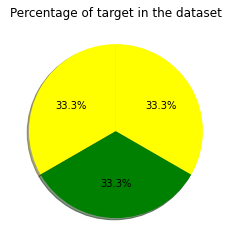

In [12]:
sizes = y_resampled.value_counts(sort = True)
colors = ["yellow","green"] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of target in the dataset')
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,random_state=42)

In [16]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
y_pred = rfc.predict(X_test)

In [23]:
#On train Set 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
y_pred=rfc.predict(X_train)


print("Accuracy :" ,accuracy_score(y_train,y_pred))

Accuracy : 0.9778340721975934


In [25]:
#On test Set 
y_pred=rfc.predict(X_test)

print("Accuracy :" ,accuracy_score(y_test,y_pred))

Accuracy : 0.9335863377609108
